# One Dimension Tensor

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tensor_1d = np.array([1.3,1,4.0,23.99])

In [3]:
#Use this commend to convert to tensor
tf_tensor = tf.convert_to_tensor(tensor_1d, dtype=tf.float64)

In [4]:
#print the tensor
with tf.Session() as sess:
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[2]))

[ 1.3   1.    4.   23.99]
1.3
4.0


# Tensor Handling

In [5]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)])
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)])

In [6]:
#Use constant to transfer
matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)

In [7]:
#Basic math operation of multiple and add
matrix_product = tf.matmul(matrix1,matrix2)
matrix_sum = tf.add(matrix1,matrix2)

In [8]:
#Calculate the determine of matrix
matrix3 = np.array([(2,7,2), (1,4,2), (9,0,2)], dtype='float32')
matrix_det = tf.matrix_determinant(matrix3)

In [9]:
#Print the result
with tf.Session() as sess:
    print('M1*M2 =\n', sess.run(matrix_product))
    print('M1+M2 =\n',sess.run(matrix_sum))
    print('Det of matrix:', sess.run(matrix_det))

M1*M2 =
 [[6 6 6]
 [6 6 6]
 [6 6 6]]
M1+M2 =
 [[3 3 3]
 [3 3 3]
 [3 3 3]]
Det of matrix: 55.999992


# Prepare the input data

In [30]:
import matplotlib.image as mp_image

In [75]:
#read the image file
file = 'C:/Users/AdamChang/Pictures/frank-mckenna-127338-unsplash.png'
input_image = mp_image.imread(file)

In [79]:
input_image

array([[[0.8352941 , 0.8627451 , 0.83137256, 1.        ],
        [0.8392157 , 0.8666667 , 0.8352941 , 1.        ],
        [0.8392157 , 0.8666667 , 0.8352941 , 1.        ],
        ...,
        [0.29803923, 0.6       , 0.8666667 , 1.        ],
        [0.28235295, 0.5921569 , 0.8862745 , 1.        ],
        [0.28235295, 0.6039216 , 0.9019608 , 1.        ]],

       [[0.8352941 , 0.8627451 , 0.83137256, 1.        ],
        [0.8392157 , 0.8666667 , 0.8352941 , 1.        ],
        [0.8392157 , 0.8666667 , 0.8352941 , 1.        ],
        ...,
        [0.29411766, 0.6039216 , 0.8666667 , 1.        ],
        [0.28235295, 0.59607846, 0.8745098 , 1.        ],
        [0.28627452, 0.60784316, 0.8980392 , 1.        ]],

       [[0.8392157 , 0.8666667 , 0.8352941 , 1.        ],
        [0.8392157 , 0.8666667 , 0.8352941 , 1.        ],
        [0.8392157 , 0.8666667 , 0.8352941 , 1.        ],
        ...,
        [0.28235295, 0.6117647 , 0.85490197, 1.        ],
        [0.28627452, 0.603921

In [76]:
#Show the file dimension and shape
print('input image dim = {}'.format(input_image.ndim))
print('input image shape = {}'.format(input_image.shape))

input image dim = 3
input image shape = (3280, 4928, 4)


In [77]:
import matplotlib.pyplot as plt

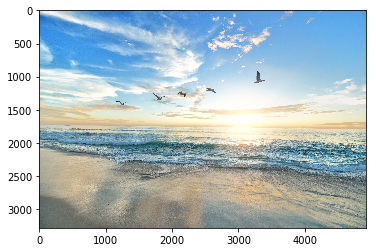

In [78]:
#Show the picture
plt.imshow(input_image)
plt.show()

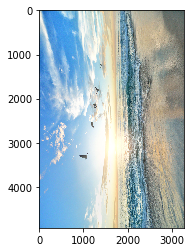

In [52]:
#Define the picture to variable
x = tf.Variable(input_image, name='x')
#Initialize all variable
model = tf.initialize_all_variables()
#Run the model
with tf.Session() as sess:
    #Transpose the picture
    x = tf.transpose(x, perm=[1,0,2])
    sess.run(model)
    result=sess.run(x)
    
plt.imshow(result)
plt.show()

# Computing gradients

Calculate the derivative of y = x^2

In [93]:
#Define a placeholder to store the number
x = tf.placeholder(tf.float32)

#Formula
y = 2*x*x

#Use tf.gradients to derivative the function
var_grad = tf.gradients(y,x)

#Run the model and input x = 1
with tf.Session() as session:
    var_grad_val = session.run(var_grad, feed_dict={x:1})

#Print the result
print(var_grad_val)

[4.0]


# Random numbers

**Unifor example code:**  
random_uniform(shape, minval, maxval, dtype, seed, name)

In [94]:
#100 numbers of uniform distribution
#the value is between 0 and 1
uniform = tf.random_uniform([100], minval=0,maxval=1,dtype=tf.float32)

[0.344782   0.19345486 0.5242765  0.62890327 0.6768756  0.6236862
 0.08976436 0.6709688  0.5192348  0.79950726 0.12693286 0.7989273
 0.38833785 0.41225004 0.3681748  0.5553454  0.44571388 0.06448436
 0.29425526 0.3882103  0.751735   0.99699557 0.07857299 0.0412544
 0.78227246 0.10453546 0.99231887 0.86524177 0.6561265  0.15956163
 0.9783633  0.50816    0.37004364 0.05535722 0.46677828 0.408306
 0.8468908  0.37136006 0.6768005  0.19330001 0.28400397 0.26512253
 0.41212475 0.07099092 0.18715453 0.03529441 0.2059226  0.6962012
 0.52697074 0.47976768 0.3208629  0.34879935 0.70979536 0.41998887
 0.6850983  0.91576076 0.6169456  0.33017337 0.87704027 0.7990658
 0.5982349  0.22899234 0.5446384  0.2852918  0.6736964  0.804855
 0.6336597  0.35120022 0.25963438 0.11689401 0.22951472 0.67069376
 0.8437463  0.43876696 0.42632544 0.23781908 0.29939115 0.93952227
 0.8474003  0.48510814 0.26484346 0.39417648 0.6406069  0.86483896
 0.51108253 0.75368524 0.67354274 0.39012396 0.8852869  0.07636178
 0.1

C:\Users\AdamChang\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


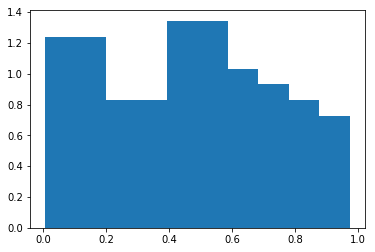

In [96]:
with tf.Session() as session:
    print(uniform.eval())
    plt.hist(uniform.eval(),normed=True)
    plt.show()

C:\Users\AdamChang\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


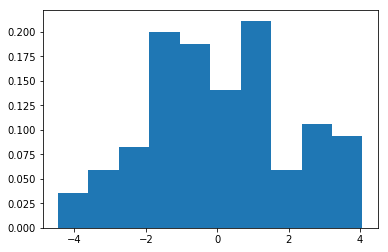

In [98]:
#Normal distribution
norm = tf.random_normal([100], mean=0, stddev=2)
with tf.Session() as sess:
    plt.hist(norm.eval(), normed=True)
    plt.show()